In [ ]:
.import numpy as np
import os
import cv2
import tensorflow 
import keras  
import glob 
import keras  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from skimage import io 
import random 
from sklearn.metrics import classification_report, confusion_matrix  

import matplotlib.pyplot as plt  
%matplotlib inline
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
DATADIR = '/content/gdrive/MyDrive/archive/lego/'

# DATADIR = 'drive/My Drive/archive/lego'
CATEGORIES =["2357 Brick corner 1x2x2" , "3003 Brick 2x2" , "3004 Brick 1x2" , "3005 Brick 1x1" , "3022 Plate 2x2" , "3023 Plate 1x2" , "3024 Plate 1x1" , "3040 Roof Tile 1x2x45deg" , "3069 Flat Tile 1x2" , "3673 Peg 2M" , "3713 Bush for Cross Axle" , "3794 Plate 1X2 with 1 Knob" , "6632 Technic Lever 3M" , "11214 Bush 3M friction with Cross axle" , "18651 Cross Axle 2M with Snap friction" , "32123 half Bush"]

flat_data_arr=[] #input array
target_arr=[] #output array

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)   # create path to each class
    for img in os.listdir(path):    # iterate over each image per class
      try:
        img_array=cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        IMG_SIZE = 50
        img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize to normalize data size
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(CATEGORIES.index(category))   # get the classification  (0 or a 1). 0=dog 1=cat
      except Exception as e:  # in the interest in keeping the output clean...
                pass
    print(f'loaded category:{category} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

x=df.iloc[:,:-1] #input data(features)  independent values
y=df.iloc[:,-1] #output data(labels)  dependent values

loaded category:2357 Brick corner 1x2x2 successfully
loaded category:3003 Brick 2x2 successfully
loaded category:3004 Brick 1x2 successfully
loaded category:3005 Brick 1x1 successfully
loaded category:3022 Plate 2x2 successfully
loaded category:3023 Plate 1x2 successfully
loaded category:3024 Plate 1x1 successfully
loaded category:3040 Roof Tile 1x2x45deg successfully
loaded category:3069 Flat Tile 1x2 successfully
loaded category:3673 Peg 2M successfully
loaded category:3713 Bush for Cross Axle successfully
loaded category:3794 Plate 1X2 with 1 Knob successfully
loaded category:6632 Technic Lever 3M successfully
loaded category:11214 Bush 3M friction with Cross axle successfully
loaded category:18651 Cross Axle 2M with Snap friction successfully
loaded category:32123 half Bush successfully


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)  #feature , labels 
print('Splitted Successfully')


Splitted Successfully


In [ ]:
from sklearn.svm import SVC  

kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [ ]:
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        73
           1       1.00      1.00      1.00        87
           2       0.97      0.98      0.97        86
           3       1.00      1.00      1.00        86
           4       1.00      0.90      0.95        88
           5       0.84      0.83      0.84        78
           6       0.98      1.00      0.99        82
           7       0.99      1.00      0.99        83
           8       0.98      0.88      0.93        74
           9       0.85      0.96      0.90        92
          10       1.00      1.00      1.00        70
          11       0.79      0.88      0.83        72
          12       1.00      0.95      0.97        82
          13       0.98      0.74      0.84        65
          14       0.75      0.85      0.79        73
          15       1.00      1.00      1.00        85

    accuracy                           0.94      1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00        90
           3       0.00      0.00      0.00        83
           4       0.00      0.00      0.00        85
           5       0.00      0.00      0.00        70
           6       0.00      0.00      0.00        88
           7       0.00      0.00      0.00        96
           8       0.00      0.00      0.00        84
           9       0.05      1.00      0.09        62
          10       0.00      0.00      0.00        73
          11       0.00      0.00      0.00        81
          12       0.00      0.00      0.00        82
          13       0.00      0.00      0.00        79
          14       0.00      0.00      0.00        84
          15       0.00      0.00      0.00        76

    accuracy                           0.05      1276

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: Linear kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        71
           2       0.97      1.00      0.99        73
           3       0.97      1.00      0.99        74
           4       1.00      0.95      0.97        80
           5       0.42      0.60      0.49        62
           6       0.99      1.00      0.99        90
           7       1.00      0.97      0.98        94
           8       0.93      0.75      0.83        95
           9       0.94      0.97      0.96        79
          10       1.00      1.00      1.00        85
          11       0.64      0.54      0.59        72
          12       1.00      0.98      0.99        86
          13       0.85      0.76      0.80        75
          14       0.74      0.87      0.80        62
          15       0.99      1.00      1.00       105

    accuracy                           0.91      1276


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  46.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  46.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  46.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  45.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  47.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  13.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  13.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  13.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  12.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  12.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  40.1s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)


SVC(C=0.1, gamma=1, kernel='poly')


In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 73   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  71   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  73   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  74   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0  76   0   0   0   0   0   0   0   0   2   1   0]
 [  0   0   0   0   0  54   0   0   0   0   0   8   0   0   0   0]
 [  0   0   0   0   0   0  90   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0  92   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0   0  91   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  78   0   0   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0  85   0   0   0   0   0]
 [  0   0   0   0   0  18   0   0   0   0   0  53   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  83   0   3   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0  61  12   1]
 [  0   0   0   0   0   0   0   0   0   3   0   0   0   1  58 

Text(69.0, 0.5, 'Truth')

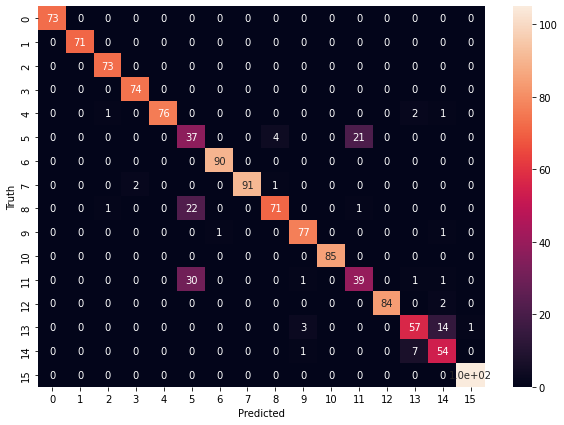

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred);
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')